# `20210425a` testing muxes

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import butter, lfilter,hilbert
import json 

In [5]:
cln = np.load("processed.npz",allow_pickle=True)["data"].item()
raw = np.load("raw.npz",allow_pickle=True)["data"].item()
t = [x*256.0/len(cln["3"]) for x in range(len(cln["3"]))]
d = [x*1.450/2 for x in t] # distance in mm

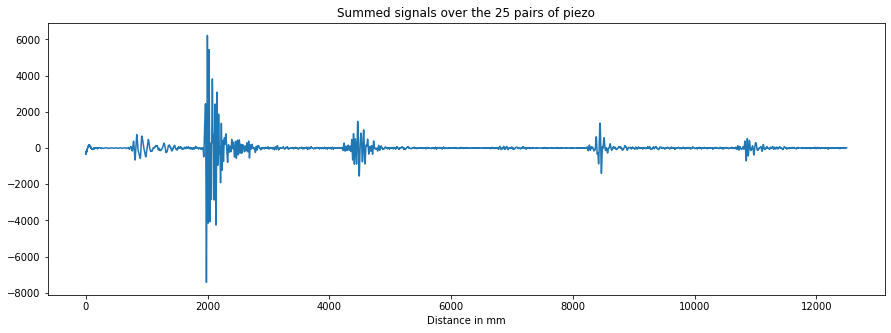

In [7]:
ALL = []
for j in list(cln.keys()):
    ALL.append(cln[j])
ALL = np.array(ALL)
plt.figure(figsize=(15,5)) 

plt.plot(np.sum(ALL,axis=0)[500:13000])
plt.xlabel("Distance in mm")
plt.title("Summed signals over the 25 pairs of piezo")
plt.savefig("summed_filtered_sigs.jpg")
plt.show()

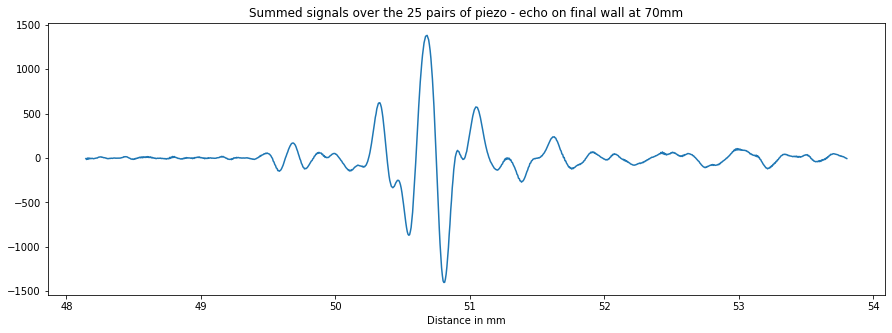

In [235]:
plt.figure(figsize=(15,5))
plt.plot(d[8500:9500],np.sum(ALL,axis=0)[8500:9500])
plt.xlabel("Distance in mm")
plt.title("Summed signals over the 25 pairs of piezo - echo on final wall at 70mm")
plt.savefig("summed_filtered_sigs_details.jpg")

Text(0.5, 1.0, 'Summed signals over the 25 pairs of piezo - echo on final wall at 70mm')

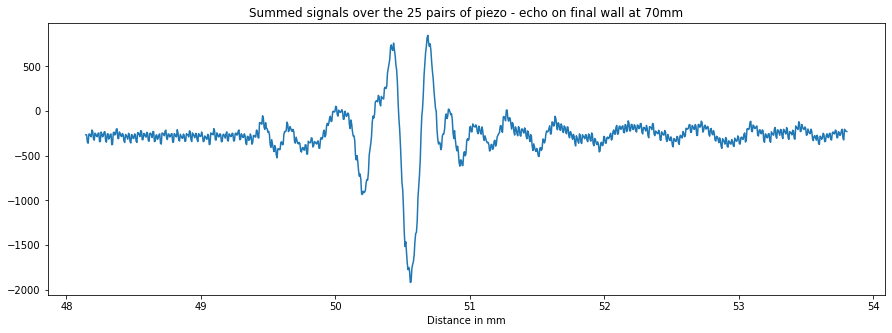

In [234]:
ALLr = []
for j in list(data.keys()):
    ALLr.append(RAW[j])
ALLr = np.array(ALLr)

plt.figure(figsize=(15,5))
plt.plot(d[8500:9500],np.sum(ALLr,axis=0)[8500:9500])
plt.xlabel("Distance in mm")
plt.title("Summed signals over the 25 pairs of piezo - echo on final wall at 70mm")

<Figure size 1080x360 with 0 Axes>

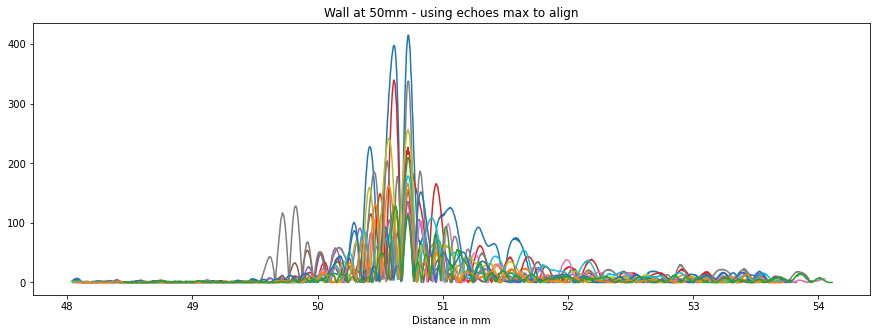

In [37]:
plt.figure(figsize=(15,5))
Ms = []
Ps=  []
for j in list(raw.keys()):

    if np.max(np.abs(cln[j][8500:9500])) > 100:
        Ms.append(np.argmin(cln[j][8500:9500]))
        #plt.plot(d[8500:9500],cln[j][8500:9500])
        Ps.append(cln[j][8500:9500])
        
offset = int(np.mean(Ms))

plt.figure(figsize=(15,5))
for k in range(len(Ps)):
    plt.plot(d[8500-Ms[k]+offset:9500-Ms[k]+offset],np.abs(Ps[k]))

    plt.xlabel("Distance in mm")
plt.title("Wall at 50mm - using echoes max to align")
plt.savefig("echoes_delays_min.jpg")

<Figure size 1080x360 with 0 Axes>

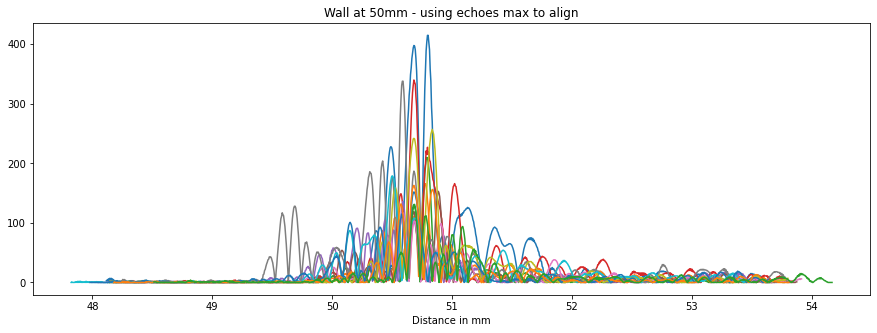

In [38]:
plt.figure(figsize=(15,5))
Ms = []
Ps=  []
for j in list(raw.keys()):

    if np.max(np.abs(cln[j][8500:9500])) > 100:
        Ms.append(np.argmax(cln[j][8500:9500]))
        #plt.plot(d[8500:9500],cln[j][8500:9500])
        Ps.append(cln[j][8500:9500])
offset = int(np.mean(Ms))

plt.figure(figsize=(15,5))
for k in range(len(Ps)):
    plt.plot(d[8500-Ms[k]+offset:9500-Ms[k]+offset],np.abs(Ps[k]))

    plt.xlabel("Distance in mm")
plt.title("Wall at 50mm - using echoes max to align")
plt.savefig("echoes_delays_max.jpg")

# Same exercice, with details

Text(0.5, 1.0, 'Wall at 50mm - using echoes max to align')

<Figure size 1080x360 with 0 Axes>

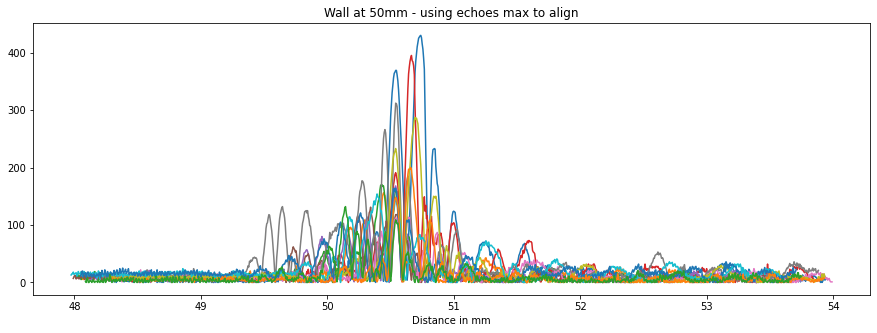

In [39]:
plt.figure(figsize=(15,5))
Ms = []
Ps=  []
for j in list(raw.keys()):

    if np.max(np.abs(cln[j][8500:9500])) > 100:
        Ms.append(np.argmax(raw[j][8500:9500]))
        #plt.plot(d[8500:9500],cln[j][8500:9500])
        Ps.append(raw[j][8500:9500])
offset = int(np.mean(Ms))

plt.figure(figsize=(15,5))
for k in range(len(Ps)):
    plt.plot(d[8500-Ms[k]+offset:9500-Ms[k]+offset],np.abs(Ps[k]))

    plt.xlabel("Distance in mm")
plt.title("Wall at 50mm - using echoes max to align")
#plt.savefig("echoes_delays_max.jpg")

Text(0.5, 1.0, 'Wall at 50mm - using echoes max to align')

<Figure size 1080x360 with 0 Axes>

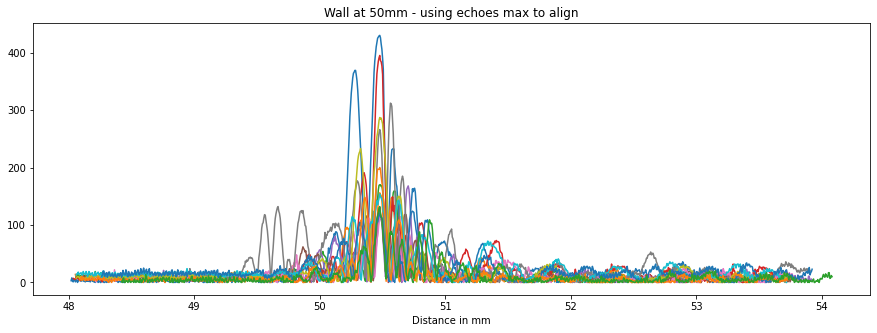

In [40]:
plt.figure(figsize=(15,5))
Ms = []
Ps=  []
for j in list(raw.keys()):

    if np.max(np.abs(cln[j][8500:9500])) > 100:
        Ms.append(np.argmin(raw[j][8500:9500]))
        #plt.plot(d[8500:9500],cln[j][8500:9500])
        Ps.append(raw[j][8500:9500])
offset = int(np.mean(Ms))

plt.figure(figsize=(15,5))
for k in range(len(Ps)):
    plt.plot(d[8500-Ms[k]+offset:9500-Ms[k]+offset],np.abs(Ps[k]))

    plt.xlabel("Distance in mm")
plt.title("Wall at 50mm - using echoes max to align")
#plt.savefig("echoes_delays_max.jpg")

Text(0.5, 1.0, 'FFTs of echoes')

<Figure size 1080x360 with 0 Axes>

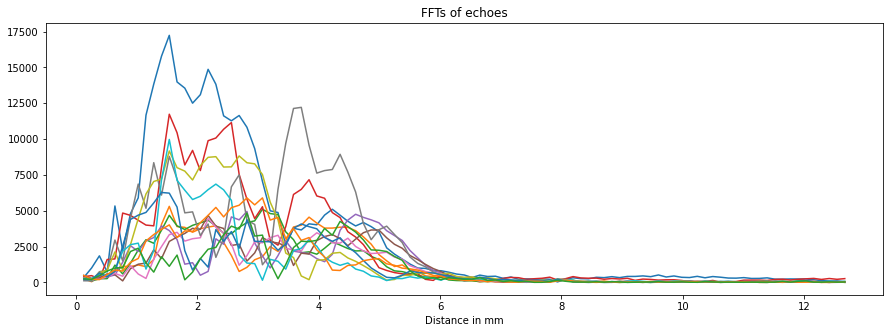

In [48]:
plt.figure(figsize=(15,5))
Ms = []
Ps=  []
for j in list(raw.keys()):

    if np.max(np.abs(cln[j][8500:9500])) > 100:
        Ms.append(np.argmin(raw[j][8500:9500]))
        #plt.plot(d[8500:9500],cln[j][8500:9500])
        Ps.append(np.abs(np.fft.fft(raw[j][8500:9500])))
offset = int(np.mean(Ms))
F = len(Ps[-1])
f = [x*128/F for x in range(F)]
plt.figure(figsize=(15,5))
for k in range(len(Ps)):
    plt.plot(f[1:100],np.abs(Ps[k])[1:100])

    plt.xlabel("Distance in mm")
plt.title("FFTs of echoes")
#plt.savefig("echoes_delays_max.jpg")